In [1]:
from PIL import Image as IMG
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.lib.latextools import latex_to_png
import matplotlib
import random
import tqdm

In [14]:
myfr = pd.read_csv("D:\Img2Latex\datasets\scio_csv\data_scio_full_Copy.csv", sep='delimiter', engine='python')["formula"]
images = []
formula = []
cout =0
br = 0
matplotlib.rcParams["mathtext.fontset"] = "cm"
with tqdm.tqdm(total=len(myfr)) as pbar:
  for i, s in enumerate(myfr):
    stack = []
    sample = np.random.randint(1, 3)
    for k in range(sample):
      temp = s
      font = np.random.choice(["mathit", "mathrm", "da", "mathbf"], p=[0.3, 0.2, 0.3, 0.2])
      if font in stack:
        continue
      stack.append(font)
      if font == "mathit":
        s_k = r'\mathit{%s}'%s
      elif font == "mathrm":
        s_k = r'\mathrm{%s}'%s
      elif font == "mathbf":
        if ("Longrightarrow" in s) or ("star" in s):
          matplotlib.rcParams["mathtext.fontset"] = "dejavusans"
        s_k = r'\mathbf{%s}'%s
      elif font == "da":
        a = np.random.randint(3)
        da = np.random.choice(["A","B","C","D"])
        temp = r"%s.\ %s"%(da, s)
        if a == 0:
          s_k = r'\mathrm{%s}'%temp
        elif a == 1:
          s_k = r'\mathit{%s}'%temp
        elif a == 2:
          if ("Longrightarrow" in s) or ("star" in s):
            matplotlib.rcParams["mathtext.fontset"] = "dejavusans"
          s_k = r'\mathbf{%s}'%temp
      try:
        image = latex_to_png(s_k,backend="matplotlib", wrap=True)
        ig = IMG.open(io.BytesIO(image))
        ig_new = IMG.new('RGB', ig.size, color = 'white')
        ig_new.paste(ig,(0,0),ig)
        ig_new.save(f"D:\Img2Latex\Latex_ocr\data_train/train_{i}_{k}_{font}.png")
        #tao va luu anh thanh cong
        images.append(f"train_{i}_{k}_{font}.png")
        formula.append(temp)
        matplotlib.rcParams["mathtext.fontset"] = "cm"
      except:
        cout +=1
    if i%20 == 0:
      save_frame = pd.DataFrame({"image":images,"formula":formula})
      save_frame.to_csv("./train_data.csv")
    pbar.update(1)


 62%|██████▏   | 62147/99965 [1:53:46<1:39:19,  6.35it/s]Font 'bf' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'bf' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'bf' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'bf' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
 72%|███████▏  | 72287/99965 [2:16:20<1:22:09,  5.61it/s]Font 'bf' does not have a glyph for '\u25ab' [U+25ab], substituting with a dummy symbol.
Font 'bf' does not have a glyph for '\u25ab' [U+25ab], substituting with a dummy symb

In [11]:
s = r"|3x - 2| = x - 3 ongrightarrow 8x^{2} - 4x - 5 = 0"
s_k = r'\mathbf{%s}'%s

In [8]:
print(s_k)

\mathbf{|3x - 2| = x - 3 \Longrightarrow 8x^{2} - 4x - 5 = 0}


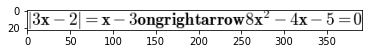

In [13]:
matplotlib.rcParams["mathtext.fontset"] = "dejavusans" if ("Longrightarrow") in s else "cm"
image = latex_to_png(s_k,backend="matplotlib", wrap=True)
ig = IMG.open(io.BytesIO(image))
ig_new = IMG.new('RGB', ig.size, color = 'white')
ig_new.paste(ig,(0,0),ig)
plt.imshow(ig_new)